In [8]:
# Importação das bibliotecas necessárias

import pandas as pd # para criação do data frame
from sklearn.model_selection import train_test_split # para separação dos conjuntos de treino e teste
from sklearn.linear_model import LogisticRegression # para construção do modelo de Regressão Logística
from sklearn import metrics # para computação das métricas de avaliação
import seaborn as sn # para visualização dos resultados
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Nosso Problema

Previsão de Diabetes com Aprendizado de Máquina

Imagine que você trabalha em uma clínica de saúde que atende pessoas em situação de risco para diabetes tipo 2. Com o crescimento no número de pacientes e a grande quantidade de exames realizados diariamente, os médicos querem usar inteligência artificial para ajudar a identificar possíveis casos de diabetes com base em dados clínicos básicos.

Você recebe um conjunto de dados com informações sobre pacientes como:

- Número de gestações

- Nível de glicose no sangue

- Pressão arterial

- Espessura da pele

- Nível de insulina

- IMC (índice de massa corporal)

- Idade

- Histórico familiar de diabetes

O objetivo é construir um modelo preditivo que, ao receber os dados de um novo paciente, consiga indicar a probabilidade de que essa pessoa tenha diabetes.

- 0:	O paciente não tem diabetes
- 1:	O paciente tem diabetes

In [16]:
# 2. Carregar os dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
colunas = ["n_pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", 
           "bmi", "diabetes_pedigree", "age", "outcome"]
df = pd.read_csv(url, names=colunas)

In [9]:
# 3. Separar variáveis independentes e alvo
X = df.drop("outcome", axis=1)
y = df["outcome"]


Durante o treinamento de modelos é necessário separar o conjunto de dados de maneira a que consigamos treinar o modelo e também avaliá-lo.

**Conjunto de Treino**: Amostra dos dados utilizada para o aprendizado/construção do modelo.

**Conjunto de Teste**: Amostra dos dados utilizada para avaliar a capacidade de predição do modelo em novos dados.


Em geral, utiliza-se uma divisão de 80%/20% ou 70%/30% para treino e teste, respectivamente. 

In [10]:
# 4. Separar em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


é aleatório por padrão, ou seja, toda vez que você rodar, ele pode dividir os dados em partes diferentes.
Se você rodar várias vezes com random_state=0, a divisão será sempre igual.

Se você rodar com random_state=1, a divisão será diferente da random_state=0, mas sempre a mesma para o 1.

In [11]:
# 5. Treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
# 6. Fazer previsões
y_pred = model.predict(X_test)

In [13]:
# 7. Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))


Acurácia: 0.7359307359307359


In [14]:
# 8. Matriz de confusão
confusion_matrix(y_test, y_pred)

array([[120,  31],
       [ 30,  50]])

In [15]:
novos_pacientes = {
    "n_pregnancies": [1, 3, 5],
    "glucose": [105, 150, 175],
    "blood_pressure": [70, 80, 88],
    "skin_thickness": [20, 32, 35],
    "insulin": [80, 130, 180],
    "bmi": [28.5, 33.1, 38.0],
    "diabetes_pedigree": [0.4, 0.7, 1.2],
    "age": [25, 45, 60]
}
novos_df = pd.DataFrame(novos_pacientes)

# 7. Fazer previsões
predicoes = model.predict(novos_df)

# 8. Mostrar resultados
novos_df["tem_diabetes (previsto)"] = predicoes

novos_df

,n_pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,tem_diabetes (previsto)
0,1,105,70,20,80,28.5,0.4,25,0
1,3,150,80,32,130,33.1,0.7,45,1
2,5,175,88,35,180,38.0,1.2,60,1


Atividade a baixo

Acurácia: 0.864406779661017

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59



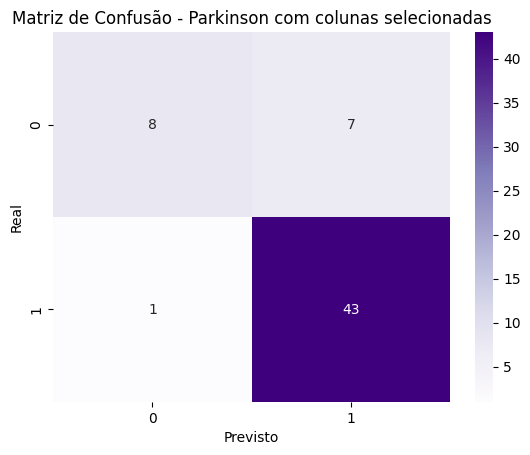

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

# Carregar dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)

# Selecionar colunas específicas + variável alvo
colunas_selecionadas = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 
                        'MDVP:Jitter(%)', 'MDVP:Shimmer', 'spread1']
X = df[colunas_selecionadas]
y = df['status']  # 1 = Parkinson, 0 = saudável

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Matriz de Confusão - Parkinson com colunas selecionadas")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
